In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./data/simdat.csv", index_col="rownames")

In [3]:
df.head()

,Group,Time,Trial,Condition,Subject,Y
rownames,,,,,,
1,Adults,0.000000,-10,-1,a01,0.755447
2,Adults,20.202020,-10,-1,a01,2.783476
3,Adults,40.404040,-10,-1,a01,1.969696
4,Adults,60.606061,-10,-1,a01,0.681430
5,Adults,80.808081,-10,-1,a01,1.693919


In [4]:
df = df[['Y']]

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/weather3.csv")

df.head()

df = df[["AQI"]]

In [6]:
data = np.array(df)
data

array([[80],
       [88],
       [94],
       ...,
       [71],
       [71],
       [72]])

In [7]:
def sequence(data, prev):

    iterable = [data[i:] for i in range(prev + 1)]

    a = [k[:-1] for k in zip(*iterable)]
    b = [k[-1] for k in zip(*iterable)]


    a = np.array(a)
    b = np.array(b)

    b = b.reshape(-1, 1)

    return a, b

In [38]:
x, y = sequence(data, 6)

In [28]:
x[:5]

array([[[80],
        [88],
        [94],
        [91],
        [87],
        [86]],

       [[88],
        [94],
        [91],
        [87],
        [86],
        [84]],

       [[94],
        [91],
        [87],
        [86],
        [84],
        [82]],

       [[91],
        [87],
        [86],
        [84],
        [82],
        [80]],

       [[87],
        [86],
        [84],
        [82],
        [80],
        [79]]])

In [29]:
y[:5]

array([[84],
       [82],
       [80],
       [79],
       [78]])

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [44]:
model = Sequential()

model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [45]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                448       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [46]:
train_size = round(0.95 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [47]:
x_train.shape

(11064, 6, 1)

In [48]:
y_train.shape

(11064, 1)

In [49]:
history = model.fit(x_train, y_train, validation_split=0.08, epochs = 100)


Epoch 1/100
319/319 [==============================] - 1s 1ms/step - loss: 264.4034 - mae: 7.4257 - val_loss: 56.2099 - val_mae: 4.2613
Epoch 2/100
319/319 [==============================] - 0s 958us/step - loss: 147.5657 - mae: 5.5090 - val_loss: 48.9384 - val_mae: 3.3132
Epoch 3/100
319/319 [==============================] - 0s 938us/step - loss: 145.3284 - mae: 5.4199 - val_loss: 57.4221 - val_mae: 4.1533
Epoch 4/100
319/319 [==============================] - 0s 930us/step - loss: 150.8005 - mae: 5.6207 - val_loss: 52.3999 - val_mae: 3.8019
Epoch 5/100
319/319 [==============================] - 0s 952us/step - loss: 144.1395 - mae: 5.3025 - val_loss: 48.9560 - val_mae: 3.2194
Epoch 6/100
319/319 [==============================] - 0s 929us/step - loss: 141.8751 - mae: 5.3084 - val_loss: 62.4082 - val_mae: 4.6946
Epoch 7/100
319/319 [==============================] - 0s 926us/step - loss: 146.3978 - mae: 5.4613 - val_loss: 52.9536 - val_mae: 3.8437
Epoch 8/100
319/319 [===============

In [51]:
import matplotlib.pyplot as plt

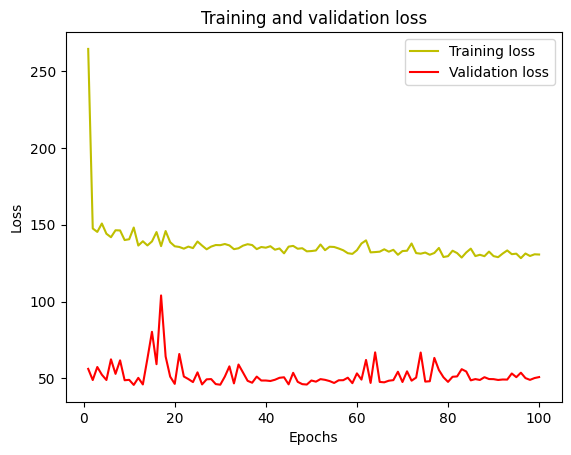

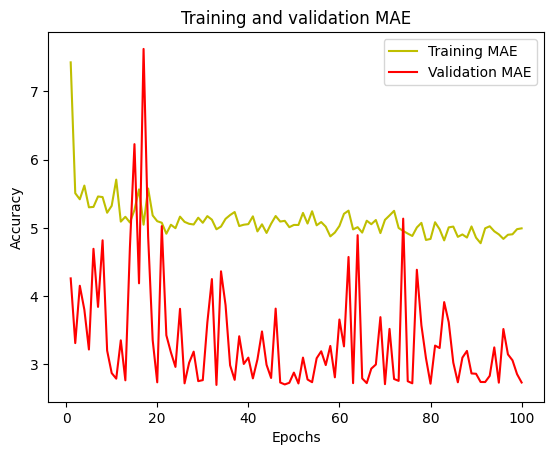

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
y_pred = model.predict(x_test)

19/19 [==============================] - 0s 594us/step


In [54]:
xs = np.arange(0, len(y_pred), 1)

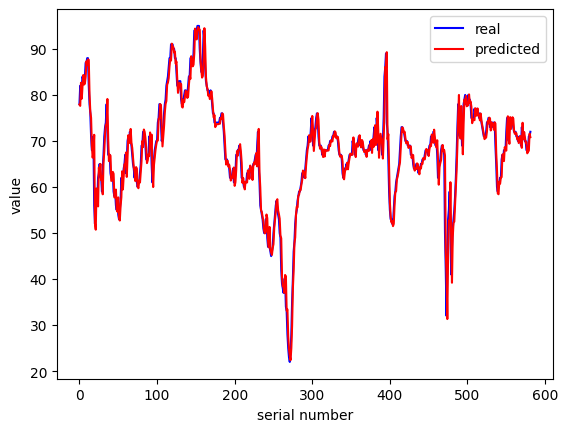

In [55]:
plt.plot(xs, y_test, color = 'blue', label = 'real')
plt.plot(xs, y_pred, color = 'red', label = 'predicted')
plt.xlabel('serial number')
plt.ylabel('value')

plt.legend()

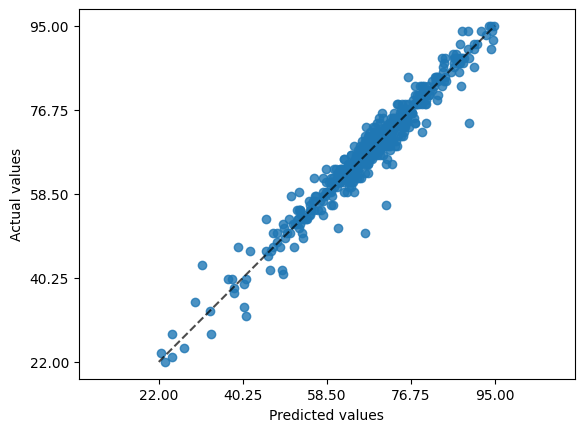

R2 Score: 0.9473521113395691
Mean Absolute Error: 1.6977324502164965
Mean Squared Error: 6.598227406542888
Mean Absolute Percentage Error: 0.027184689136254058
Mean Absolute Error: 1.1423606872558594
Explained Varaince Score: 0.9474788172092967


In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay


display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot(kind="actual_vs_predicted")
plt.show()

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {median_absolute_error(y_test, y_pred)}")
print(f"Explained Varaince Score: {explained_variance_score(y_test, y_pred)}")